<a href="https://colab.research.google.com/github/SPBNO1/Project-Fake-new/blob/main/project_Fakenew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install attacut

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import re
import string
!pip install pythainlp
import pythainlp
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
from pythainlp import Tokenizer

!pip install deepcut
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.

In [29]:
Xtrain = pd.read_csv("data/fake.csv")
Y_train = pd.read_csv("data/real.csv")

In [30]:
Xtrain

,title,body,type,W/D/Y,url
0,ข่าวปลอม อย่าแชร์! เว็บไซต์ www.gsb-th-online....,ตามที่มีผู้พบเห็นเว็บไซต์ www.gsb-th-online.co...,การเงิน,11/04/67,GSB Loan
1,ข่าวปลอม อย่าแชร์! ดร.เศรษฐพุฒิ สุทธิวาทนฤพุฒิ...,ตามที่มีคลิปวิดีโอได้เผยแพร่เนื้อหา เกี่ยวกับป...,ความสงบและความมันคง,22/11/64,https://www.bot.or.th/Thai/PressandSpeeches/Sp...
2,เอกสารแถลงการณ์ของสถานทูตเมียนมาร์ในประเทศไทย...,ตามที่มีการเผยแพร่ข่าวสารในสื่อออนไลน์เรื่อง เ...,นโยบายรัฐบาล-ข่าวสาร,22/11/64,https://www.antifakenewscenter.com/%e0%b8%84%e...
3,‘กกต.’ แจงวุ่นเฟคนิวส์ หมายเลข ‘เพื่อไทย-ก้าวไ...,เมื่อวันที่ 27 เมษายน สำนักงานคณะกรรมการการเลื...,นโยบายรัฐบาล-ข่าวสาร,27/04/66,https://www.matichon.co.th/politics/news_3946572
4,ข่าวปลอม! มีการลักลอบนำชาวมุสลิมต่างด้าวเข้าภู...,จากกรณีข่าวลือที่ระบุว่าผู้ว่าจังหวัดภูเก็ตเหม...,นโยบายรัฐบาล-ข่าวสาร,31/01/65,https://mgronline.com/uptodate/detail/96500000...
...,...,...,...,...,...
303,พายุไต้ฝุ่นเข้าไทย ฝนตกหนักที่สุดในรอบ 10 ปี น...,ตามที่มีการเผยแพร่ข้อมูลเรื่องพายุไต้ฝุ่นเข้าไ...,ภัยพิบัติ,10/08/66,https://www.antifakenewscenter.com/%e0%b8%a0%e...
304,ใช้ปัสสาวะหยอดจมูกรักษาโรคไซนัสได้,ตามที่มีการโพสต์และแชร์ข้อความในสื่อต่าง ๆ ถึง...,ผลิตภัณฑ์สุขภาพ,09/08/66,https://www.antifakenewscenter.com/%e0%b8%9c%e...
305,ใช้ปัสสาวะหยอดจมูกรักษาโรคไซนัสได้,ตามที่มีการโพสต์และแชร์ข้อความในสื่อต่าง ๆ ถึง...,ผลิตภัณฑ์สุขภาพ,09/08/66,https://www.antifakenewscenter.com/%e0%b8%9c%e...
306,ไลน์ผู้บริหารของสำนัก ก.ล.ต. ชักชวนลงทุน,ตามที่มีข่าวสารในประเด็นเรื่องไลน์ผู้บริหารของ...,การเงิน-หุ้น,09/08/66,https://www.antifakenewscenter.com/%e0%b8%81%e...


In [10]:
import gdown
import tensorflow as tf
from tensorflow import keras
import re

In [7]:
gdown.download('https://drive.google.com/uc?id=0B0ZXk88koS2KV1FJN0xRX1FxaFE&export=download', 'th.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=0B0ZXk88koS2KV1FJN0xRX1FxaFE&export=download
From (redirected): https://drive.google.com/uc?id=0B0ZXk88koS2KV1FJN0xRX1FxaFE&export=download&confirm=t&uuid=e4022b78-6693-43ac-b7e7-011197bc4f3f
To: /content/th.zip
100%|██████████| 122M/122M [00:02<00:00, 59.5MB/s]


'th.zip'

In [8]:
!unzip th.zip

Archive:  th.zip
  inflating: th.bin                  
  inflating: th.tsv                  


In [11]:
with open('th.tsv') as f:
  vocab = []
  W = None
  vec = ''
  for line in f.readlines():
    temp = line.split('\t')
    if len(temp) == 3:
      vocab.append(temp[1])
      if int(temp[0]) % 1000 == 0:
        print('\r' + temp[0], end='')
      wordvector = np.fromstring(re.sub('\s+', ' ', vec)[1:-1], sep=' ', dtype=np.float32)
      if len(wordvector) > 0:
        if W is None:
          W = wordvector.copy()
        else:
          W = np.vstack((W, wordvector))
      vec = temp[-1]
    elif len(temp) == 1:
      vec += temp[-1]
  W = np.vstack((W, wordvector))
print('\n')
print(len(vocab))
print(W.shape)

0

<ipython-input-11-dc2ff50a1690>:11: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  wordvector = np.fromstring(re.sub('\s+', ' ', vec)[1:-1], sep=' ', dtype=np.float32)


30000

30225
(30225, 300)


In [31]:
def sent2idx(x):
  xidx = []
  for w in tokenize(x):
    if w in vocab:
      xidx.append(vocab.index(w))
  return np.array(xidx)

In [32]:
Xtrain["class"] = 0
Y_train["class"] = 1

In [22]:
Xtrain.shape, Y_train.shape

((299, 6), (496, 7))

In [33]:
df_fake_manual_testing = Xtrain.tail(10)
for i in range(307,298,-1):
    Xtrain.drop([i], axis = 0, inplace = True)


df_true_manual_testing = Y_train.tail(10)
for i in range(504,495,-1):
    Y_train.drop([i], axis = 0, inplace = True)

In [34]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-34-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-34-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [35]:
# pd.concat(): ใช้เพื่อรวม DataFrame ข่าวปลอมและ DataFrame ข่าวจริงเข้าด้วยกัน โดยกำหนดพารามิเตอร์ axis=0 เพื่อรวมตามแนวแถว (แนวดิ่ง) เพื่อให้ข้อมูลข่าวปลอมและข่าวจริงเรียงต่อกันใน DataFrame เดียว
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)

In [37]:
df_merge = pd.concat([Xtrain, Y_train], axis =0 )

In [38]:
df_merge.columns

Index(['title', 'body', 'type', 'W/D/Y', 'url', 'class', 'summary', 'year'], dtype='object')

In [39]:
df_drop=df_merge.drop(["title", "type","W/D/Y","url","year","summary"], axis = 1)

In [40]:
df_drop.isnull().sum()

body     0
class    0
dtype: int64

In [41]:
def wordopt(text):
    text = text.lower()                                                               #แปลงข้อความทั้งหมดให้เป็นตัวอักษรพิมพ์เล็กทั้งหมด
    text = re.sub('\[.*?\]', '', text)                                                #ลบข้อความที่อยู่ในวงเล็บเหลี่ยมทั้งหมดออก
    text = re.sub("\\W"," ",text)                                                     #แทนทุกตัวอักษรที่ไม่ใช่ตัวอักษรหรือตัวเลขด้วยช่องว่าง
    text = re.sub('https?://\S+|www\.\S+', '', text)                                  #ลบ URL หรือลิงก์ออกจากข้อความ
    text = re.sub('<.*?>+', '', text)                                                 #ลบ tag HTML ออกจากข้อความ
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)                   #ลบเครื่องหมายวรรคตอนออกจากข้อความ
    text = re.sub('\n', '', text)                                                     #ลบเครื่องหมายขึ้นบรรทัดใหม่ออกจากข้อความ
    text = re.sub('\w*\d\w*', '', text)                                               #ลบคำที่มีตัวเลขอยู่ในข้อความออก
    text = re.sub('a-zA-Zn-๙0-9', '', text)                                          #ลบตัวอักษร a-z, A-Z, ตัวเลข, และตัวอักษรไทยออกจากข้อความ
    return text

In [42]:
df_drop

,body,class
0,ตามที่มีผู้พบเห็นเว็บไซต์ www.gsb-th-online.co...,0
1,ตามที่มีคลิปวิดีโอได้เผยแพร่เนื้อหา เกี่ยวกับป...,0
2,ตามที่มีการเผยแพร่ข่าวสารในสื่อออนไลน์เรื่อง เ...,0
3,เมื่อวันที่ 27 เมษายน สำนักงานคณะกรรมการการเลื...,0
4,จากกรณีข่าวลือที่ระบุว่าผู้ว่าจังหวัดภูเก็ตเหม...,0
...,...,...
491,ปัจจุบันมีการใช้อาวุธปืนทำร้ายร่างกายผู้อื่นเพ...,1
492,กรมอุทยานแห่งชาติ สัตว์ป่า และพันธุ์พืช รับแจ้...,1
493,เมื่อสูบบุหรี่ไฟฟ้า นิโคตินเหลวในบุหรี่ไฟฟ้าจะ...,1
494,คณะรัฐมนตรี มีมติเห็นชอบนโยบายกำกับการนำเข้าเศ...,1


In [68]:
df_drop.to_csv("df_drop.csv")

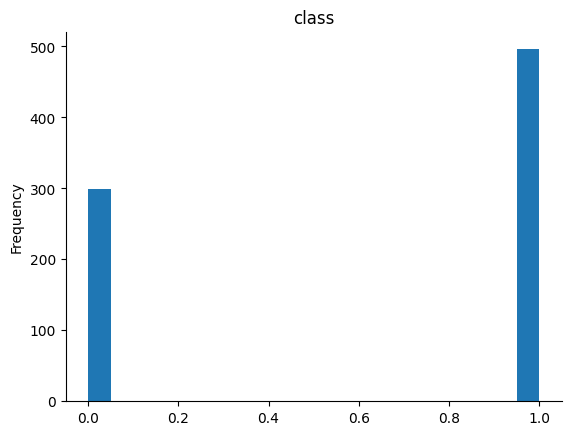

In [53]:
# @title class

from matplotlib import pyplot as plt
df_drop['class'].plot(kind='hist', bins=20, title='class')
plt.gca().spines[['top', 'right',]].set_visible(False)

# ส่วนใหม่

In [54]:
def sent2idx(x):
  xidx = []
  for w in tokenize(x):
    if w in vocab:
      xidx.append(vocab.index(w))
  return np.array(xidx)

In [47]:
Xtrain_idx = []
maxlen = 0
for x in Xtrain:
  Xtrain_idx.append(sent2idx(x))
  if len(Xtrain_idx[-1]) > maxlen:
    maxlen = len(Xtrain_idx[-1])
  print(len(Xtrain_idx[-1]))

0
0
0
0
0
0


In [48]:
print(maxlen)

0


In [49]:
vocab[0]

'ที่'

In [50]:
vocab = [''] + vocab
print(len(vocab))

30226


In [51]:
vocab[0]

''

In [55]:
!pip install sklearn_crfsuite
!pip install emoji
!pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
!pip install fastai
!wget https://github.com/PyThaiNLP/wisesight-sentiment/archive/master.zip
!unzip master.zip
!mkdir wisesight_data; ls
!cd wisesight-sentiment-master/kaggle-competition; ls

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 11.0 MB/s eta 0:00:00
     - 23.4 MB 3.4 MB/s 0:00:05
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
--2024-05-08 15:16:40--  https://github.com/PyThaiNLP/wisesight-sentiment/archive/master.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/PyThaiNLP/wisesight-sentiment/zip/refs/heads/master [following]
--2024-05-08 15:16:40--  https://codeload.github.com/PyThaiNLP/wisesight-sentiment/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip    

In [56]:
import matplotlib
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
!cp thsarabunnew-webfont.ttf /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!cp thsarabunnew-webfont.ttf /usr/share/fonts/truetype/
matplotlib.font_manager._rebuild()
matplotlib.rc('font', family='TH Sarabun New')

--2024-05-08 15:16:55--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-05-08 15:16:55--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.003s  

2024-05-08 15:16:55 (29.8 MB/s) - ‘t

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

In [57]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from pythainlp import word_tokenize
from tqdm import tqdm_notebook
from pythainlp.ulmfit import process_thai

#viz
import matplotlib.pyplot as plt
import seaborn as sns

Corpus: wiki_lm_lstm
- Downloading: wiki_lm_lstm 0.32


  0%|          | 0/1050919089 [00:00<?, ?it/s]

Corpus: wiki_itos_lstm
- Downloading: wiki_itos_lstm 0.32


  0%|          | 0/1530484 [00:00<?, ?it/s]

In [58]:
?process_thai

In [59]:
from pythainlp.ulmfit import *
process_thai("บ้านนนนน ()อยู่นานนานนาน 😂🤣😃😄😅 PyThaiNLP amp;     www.google.com")

['บ้าน',
 'xxrep',
 'อยู่',
 'xxwrep',
 'นาน',
 '😂',
 '🤣',
 '😃',
 '😄',
 '😅',
 'pythainlp',
 '&',
 'xxurl']

In [81]:
with open("wisesight-sentiment-master/kaggle-competition/train.txt") as f:
    texts = [line.strip() for line in f.readlines()]

with open("wisesight-sentiment-master/kaggle-competition/train_label.txt") as f:
    categories = [line.strip() for line in f.readlines()]

all_df = pd.DataFrame({"category":categories, "texts":texts})
all_df.to_csv('df_drop.csv',index=False)
all_df.shape

(24063, 2)

In [82]:
with open("wisesight-sentiment-master/kaggle-competition/test.txt") as f:
    texts = [line.strip() for line in f.readlines()]

test_df = pd.DataFrame({"category":"test", "texts":texts})
test_df.shape

(2674, 2)

In [83]:
all_df["processed"] = all_df.texts.map(lambda x: "|".join(process_thai(x)))
all_df["wc"] = all_df.processed.map(lambda x: len(x.split("|")))
all_df["uwc"] = all_df.processed.map(lambda x: len(set(x.split("|"))))

test_df["processed"] = test_df.texts.map(lambda x: "|".join(process_thai(x)))
test_df["wc"] = test_df.processed.map(lambda x: len(x.split("|")))
test_df["uwc"] = test_df.processed.map(lambda x: len(set(x.split("|"))))

In [84]:
#prevalence
all_df.category.value_counts() / all_df.shape[0]

category
neu    0.544612
neg    0.255164
pos    0.178698
q      0.021527
Name: count, dtype: float64

In [69]:
train_df = all_df.copy()
valid_df = pd.read_csv('df_drop.csv')

In [70]:
valid_df.head()

,Unnamed: 0,body,class
0,0,ตามที่มีผู้พบเห็นเว็บไซต์ www.gsb-th-online.co...,0
1,1,ตามที่มีคลิปวิดีโอได้เผยแพร่เนื้อหา เกี่ยวกับป...,0
2,2,ตามที่มีการเผยแพร่ข่าวสารในสื่อออนไลน์เรื่อง เ...,0
3,3,เมื่อวันที่ 27 เมษายน สำนักงานคณะกรรมการการเลื...,0
4,4,จากกรณีข่าวลือที่ระบุว่าผู้ว่าจังหวัดภูเก็ตเหม...,0


In [85]:
#prevalence
print(train_df["category"].value_counts() / train_df.shape[0])

category
neu    0.544612
neg    0.255164
pos    0.178698
q      0.021527
Name: count, dtype: float64


In [87]:
#prevalence
print(valid_df["body"].value_counts() / valid_df.shape[0])

body
ปลัดมหาดไทย เผยคืบหน้าการแก้ปัญหาหนี้นอกระบบ ล่าสุด เข้าสู่กระบวนการไกล่เกลี่ยแล้ว 32,418 ราย สามารถไกล่เกลี่ยสำเร็จ 21,249 ราย มูลหนี้ลดลง 870 ล้านบาท กำชับดำเนินการให้ครบทุกจังหวัด พร้อมส่งเสริมต่อยอดสร้างอาชีพ ไม่ให้กลับไปสู่วงจรนี้อีก วันที่ 13 มีนาคม 2567 นายสุทธิพงษ์ จุลเจริญ ปลัดกระทรวงมหาดไทย เปิดเผยว่า ภายหลังจากกระทรวงมหาดไทยเปิดรับลงทะเบียนให้ประชาชนที่มีความประสงค์ให้ทางราชการช่วยแก้ไขปัญหาหนี้นอกระบบตามนโยบายรัฐบาล โดยมีผู้มาลงทะเบียนทั้งสิ้น 153,400 ราย กระทรวงมหาดไทยจึงได้แจ้งให้ทุกจังหวัด อำเภอ เดินหน้าแก้ไขปัญหาหนี้นอกระบบอย่างต่อเนื่อง ด้วยการเชิญเจ้าหนี้และลูกหนี้มาเข้าสู่กระบวนการเจรจาไกล่เกลี่ยหนี้ โดยเมื่อเวลา 15.00 น.ที่ผ่านมา สำนักการสอบสวนและนิติการ กรมการปกครอง รายงานข้อมูลการไกล่เกลี่ยหนี้ทั่วประเทศ มีจำนวนลูกหนี้เข้าสู่กระบวนการไกล่เกลี่ยแล้ว 32,418 ราย สามารถไกล่เกลี่ยสำเร็จ 21,249 ราย มูลหนี้ลดลงรวม 870.522 ล้านบาท และมีกรณีที่เจ้าหนี้-ลูกหนี้มีความประสงค์ให้เจ้าหน้าที่ได้ส่งต่อเรื่องไปยังพนักงานสอบสวนของสถานีตำรวจในพื้นที่ดำเนินคดี 347 คดี           

In [89]:
#dependent variables
y_train = train_df["category"]
y_valid = valid_df["body"]

In [116]:
#text faetures
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(tokenizer=process_thai, ngram_range=(1,2), min_df=20, sublinear_tf=True)
tfidf_fit = tfidf.fit(all_df["texts"])
text_train = tfidf_fit.transform(train_df["texts"])
text_valid = tfidf_fit.transform(valid_df["body"])
text_test = tfidf_fit.transform(test_df["texts"])
text_train.shape, text_valid.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((24063, 4288), (795, 4288))

In [124]:
#visualize texts
!pip install --upgrade visualize
from visualize import top_feats_all, plot_top_feats
features = tfidf_fit.get_feature_names()
%time ts = top_feats_all(text_train.toarray(), y_train, features)
print(ts[0].shape)
ts[0].head()

ImportError: cannot import name 'top_feats_all' from 'visualize' (/usr/local/lib/python3.10/dist-packages/visualize/__init__.py)

In [131]:
#word count and unique word counts; actually might not be so useful
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_fit = scaler.fit(all_df[["wc","uwc"]].astype(float))
scaler_fit1 = scaler.fit(valid_df[["body"]].astype(str))
print(scaler_fit.mean_, scaler_fit.var_)
num_train = scaler_fit.transform(train_df[["wc","uwc"]].astype(float))
num_valid = scaler_fit.transform(valid_df[["body"]].astype(str))
num_test = scaler_fit.transform(test_df[["wc","uwc"]].astype(float))
num_valid.shape, num_train.shape

ValueError: could not convert string to float: 'ตามที่มีผู้พบเห็นเว็บไซต์ www.gsb-th-online.com ธนาคารออมสิน ปล่อยสินเชื่อส่วนบุคคล ทางศูนย์ต่อต้านข่าวปลอมได้ดำเนินการตรวจสอบข้อเท็จจริงกับทางธนาคารออมสิน กระทรวงการคลัง พบว่าประเด็นดังกล่าวนั้น เป็นข้อมูลเท็จ\nจากกรณีที่มีเว็บไซต์ www.gsb-th-online.com ธนาคารออมสิน ปล่อยสินเชื่อส่วนบุคคล ทางธนาคารออมสิน กระทรวงการคลัง ได้ตรวจสอบข้อมูลและชี้แจงว่า เว็บไซต์ดังกล่าวไม่ใช่ของธนาคารออมสิน ธนาคารไม่มีส่วนเกี่ยวข้องกับการเผยแพร่ข้อมูลและปล่อยสินเชื่อดังกล่าว อีกทั้งธนาคารออมสินไม่มีนโยบายให้เงินกู้ผ่านเฟซบุ๊ก แอปพลิเคชันไลน์ และ Messenger เว็บไซต์ดังกล่าวแอบอ้างนำชื่อและตราสัญลักษณ์ธนาคารออมสินไปใช้ทำรูปโปรไฟล์โดยไม่ได้รับอนุญาต และยังเผยแพร่ข้อมูลที่ไม่ตรงกับความเป็นจริง อันแสดงเจตนาจงใจหลอกลวงประชาชนและกระทบต่อชื่อเสียงภาพลักษณ์ของธนาคาร ซึ่งจะดำเนินการเอาผิดทางกฎหมายต่อไป\nธนาคารจึงขอแจ้งให้ประชาชนที่พบเห็นเว็บไซต์หรือสื่อออนไลน์อื่นๆ ใช้ชื่อและโลโก้ตลอดทั้งนำชื่อผลิตภัณฑ์หรือสีอัตลักษณ์ของธนาคารออมสินไปตั้งโปรไฟล์ โพสต์เชิญชวนให้กู้เงินลักษณะนี้ผ่านสื่อใด ๆ ถือว่าเป็นข้อมูลปลอมทั้งสิ้น\nหากถูกหลอกให้โอนเงินโปรดเก็บหลักฐานการสนทนา ลิงก์ไลน์ ชื่อ-หมายเลขโทรศัพท์ผู้ที่ให้โอนเงิน และเลขที่บัญชีธนาคารปลายทาง แจ้งศูนย์รับแจ้งเหตุภัยมิจฉาชีพทางการเงิน โทร.1115 กด 6 หรือ แจ้งความร้องทุกข์ต่อเจ้าหน้าที่ตำรวจท้องที่ทันที เพื่อให้เจ้าหน้าที่ตำรวจสามารถประสานงานไปยังธนาคารที่เกี่ยวข้องระงับความเสียหายโดยเร็วที่สุด'

In [133]:
#concatenate text and word count features
X_train = np.concatenate([num_train,text_train.toarray()],axis=1)
X_valid = np.concatenate([num_valid,text_valid.toarray()],axis=1)
X_test = np.concatenate([num_test,text_test.toarray()],axis=1)
X_train.shape, X_valid.shape

NameError: name 'num_valid' is not defined

In [134]:
!git clone https://github.com/SPBNO1/fake-new.git

Cloning into 'fake-new'...
